In [1]:
import numpy as np
import numpy.random as rng
import scipy.stats as stats
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
import seaborn as sns
sns.set()

In [2]:
# simulate Y(1:100)
T = 100
phi = .95
sv = 1.0
su = 1.0
s0 = np.sqrt(su**2 / (1-phi**2))

x = np.zeros(T)
y = np.zeros(T)

x[0] = s0 * rng.standard_normal()
y[0] = x[0] + sv * rng.standard_normal()
for i in range(1,T):
  x[i] = phi * x[i-1] + su * rng.standard_normal()
  y[i] = x[i] + sv * rng.standard_normal()

In [3]:
# BOOTSTRAP SIS
N = 1000
XB = np.zeros(N*T).reshape(T,N)
WB = np.zeros(N*T).reshape(T,N)

# amostro aproximacao de p(x1|y1)
XB[0] = s0 * rng.standard_normal(N) 
WB[0] = -(y[0]-XB[0])**2/(2*sv**2)
# amostro condicionalmente aproximacao de p(x1:t|y1:t)
for t in range(1,T):
  XB[t] =  phi * XB[t-1] + su * rng.standard_normal(N)
  WB[t] = WB[t-1] - (y[t]-XB[t])**2/(2*sv**2)


In [4]:
# OPTIMAL SIS
N = 1000
XO = np.zeros(N*T).reshape(T,N)
WO = np.zeros(N*T).reshape(T,N)

so = np.sqrt(1/((1/sv**2)+(1/su**2)))
mx = lambda x,y:(sv**2*y+su**2*phi*x)/(sv**2+su**2)
so0 = np.sqrt(1/((1/s0**2)+(1/su**2)))

# amostro aproximacao de p(x1|y1) de proposta otima
XO[0] = mx(0,y[0]) + so0 * rng.standard_normal(N) 
WO[0] = y[0]**2/(sv**2+s0**2)*(-1/2)
# amostro condicionalmente aproximacao de p(x1:t|y1:t)
for t in range(1,T):
  XO[t] =  mx(XO[t-1],y[t]) + so * rng.standard_normal(N) 
  WO[t] = WO[t-1] - (y[t]-phi*XO[t-1])**2/(2*(sv**2+su**2))

In [5]:
def calc_weights(W,t):
  w = W[t]
  maxw = np.max(w)
  sw = np.exp(w-maxw).sum()
  return np.exp(w-maxw-np.log(sw))

WBnorm = calc_weights(WB,-1)
WOnorm = calc_weights(WO,-1)

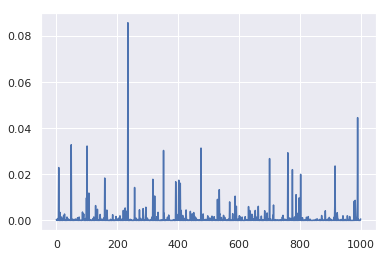

In [10]:
plt.plot(calc_weights(WO,10))

In [18]:
WO

array([[ -0.16957146,  -0.16957146,  -0.16957146, ...,  -0.16957146,
         -0.16957146,  -0.16957146],
       [ -3.05877435,  -7.17784828, -10.96817445, ...,  -9.11162718,
         -9.09251409,  -6.39875243],
       [ -4.10257438,  -7.95121037, -11.85282471, ..., -10.40024908,
         -9.38608771,  -7.34813068],
       ...,
       [-76.25588931, -77.32972161, -88.2035597 , ..., -85.08968176,
        -71.66444363, -88.96025321],
       [-76.29325305, -77.43590894, -88.33988828, ..., -85.11767286,
        -71.78249935, -89.39442715],
       [-76.34229092, -77.68965165, -89.30653189, ..., -85.1190715 ,
        -71.78560833, -89.74190381]])